## The NDDataset object

In [1]:
from spectrochempy.api import *

[SpectroChemPy 2017-07-13 14:15:37] changed default loglevel to 10
[SpectroChemPy 2017-07-13 14:15:37] The application was launched with ARGV : ['/Users/christian/miniconda3/envs/scp36/lib/python3.6/site-packages/ipykernel/__main__.py', '-f', '/Users/christian/Library/Jupyter/runtime/kernel-329f8d71-6ceb-4932-badf-4d59815d4cdf.json']
[SpectroChemPy 2017-07-13 14:15:37] API activated 



        SpectroChemPy's API
        Version   : 0.1a1.3
        Copyright : 2014-2017, LCS - Laboratory for Catalysis and Spectrochempy
            


In [2]:
%matplotlib qt5

### Create a ND-Dataset from scratch

Multidimensional array are defined in Spectrochempy using the **NDDataset** object.

Below is an example, with a 3D-array with axes. 

Let's first create the 3 one-dimentional axis, for which we can define labels, units, and masks! 

In [3]:
axe0 = Axis(coords = np.linspace(200., 300., 3),
            labels = ['cold', 'normal', 'hot'],
            mask = None,
            units = "K",
            title = 'temperature')

axe1 = Axis(coords = np.linspace(0., 60., 100),
            labels = None,
            mask = None,
            units = "minutes",
            title = 'time-on-stream')

axe2 = Axis(coords = np.linspace(4000., 1000., 10),
            labels = None,
            mask = None,
            units = "cm^-1",
            title = 'wavelength')

Here is the displayed info for axe1 for instance:

In [4]:
axe1

title,Time-on-stream
coordinates,"[ 0 0.606 ..., 59.4 60]"
units,min


Now we create some 3D data:

In [5]:
nd_data=np.array([np.array([np.sin(axe2.data*2.*np.pi/4000.)*np.exp(-y/60.) for y in axe1.data])*float(T) 
         for T in axe0.data])**2

The dataset is now create with these data and defined axis:

In [5]:
mydataset = NDDataset(nd_data,
               axes = [axe0, axe1, axe2],
               title='Absorbance',
               units='absorbance'
              )

mydataset.description = """Dataset example created for this tutorial. 
It's a 3-D dataset (with dimensionless intensity)"""

mydataset.author = 'Tintin and Milou'

We can get some information about this object:

In [6]:
mydataset

NDDataset([[[ 2.4e-27,    1e+04, ...,    3e+04,    4e+04],
            [2.35e-27,  9.8e+03, ..., 2.94e+04, 3.92e+04],
            ..., 
            [3.31e-28, 1.38e+03, ..., 4.14e+03, 5.52e+03],
            [3.25e-28, 1.35e+03, ..., 4.06e+03, 5.41e+03]],

           [[3.75e-27, 1.56e+04, ..., 4.69e+04, 6.25e+04],
            [3.67e-27, 1.53e+04, ..., 4.59e+04, 6.13e+04],
            ..., 
            [5.18e-28, 2.16e+03, ..., 6.47e+03, 8.63e+03],
            [5.07e-28, 2.11e+03, ..., 6.34e+03, 8.46e+03]],

           [[ 5.4e-27, 2.25e+04, ..., 6.75e+04,    9e+04],
            [5.29e-27, 2.21e+04, ..., 6.62e+04, 8.82e+04],
            ..., 
            [7.46e-28, 3.11e+03, ..., 9.32e+03, 1.24e+04],
            [7.31e-28, 3.05e+03, ..., 9.14e+03, 1.22e+04]]])

NDDataset can be sliced like conventional numpy-array...

In [7]:
new = mydataset[..., 0]
new

NDDataset([[[ 2.4e-27],
            [2.35e-27],
            ..., 
            [3.31e-28],
            [3.25e-28]],

           [[3.75e-27],
            [3.67e-27],
            ..., 
            [5.18e-28],
            [5.07e-28]],

           [[ 5.4e-27],
            [5.29e-27],
            ..., 
            [7.46e-28],
            [7.31e-28]]])

or using the axes labels:

In [8]:
new = mydataset['hot']
new

NDDataset([[[ 5.4e-27, 2.25e+04, ..., 6.75e+04,    9e+04],
            [5.29e-27, 2.21e+04, ..., 6.62e+04, 8.82e+04],
            ..., 
            [7.46e-28, 3.11e+03, ..., 9.32e+03, 1.24e+04],
            [7.31e-28, 3.05e+03, ..., 9.14e+03, 1.22e+04]]])

Single-element dimension are kept but can also be squeezed easily:

In [9]:
new = new.squeeze()
new

NDDataset([[ 5.4e-27, 2.25e+04, ..., 6.75e+04,    9e+04],
           [5.29e-27, 2.21e+04, ..., 6.62e+04, 8.82e+04],
           ..., 
           [7.46e-28, 3.11e+03, ..., 9.32e+03, 1.24e+04],
           [7.31e-28, 3.05e+03, ..., 9.14e+03, 1.22e+04]])

To plot a dataset, use the `plot` command (generic plot). As the NDDataset is 2D, a contour plot is displayed by default.

<IPython.core.display.Javascript object>


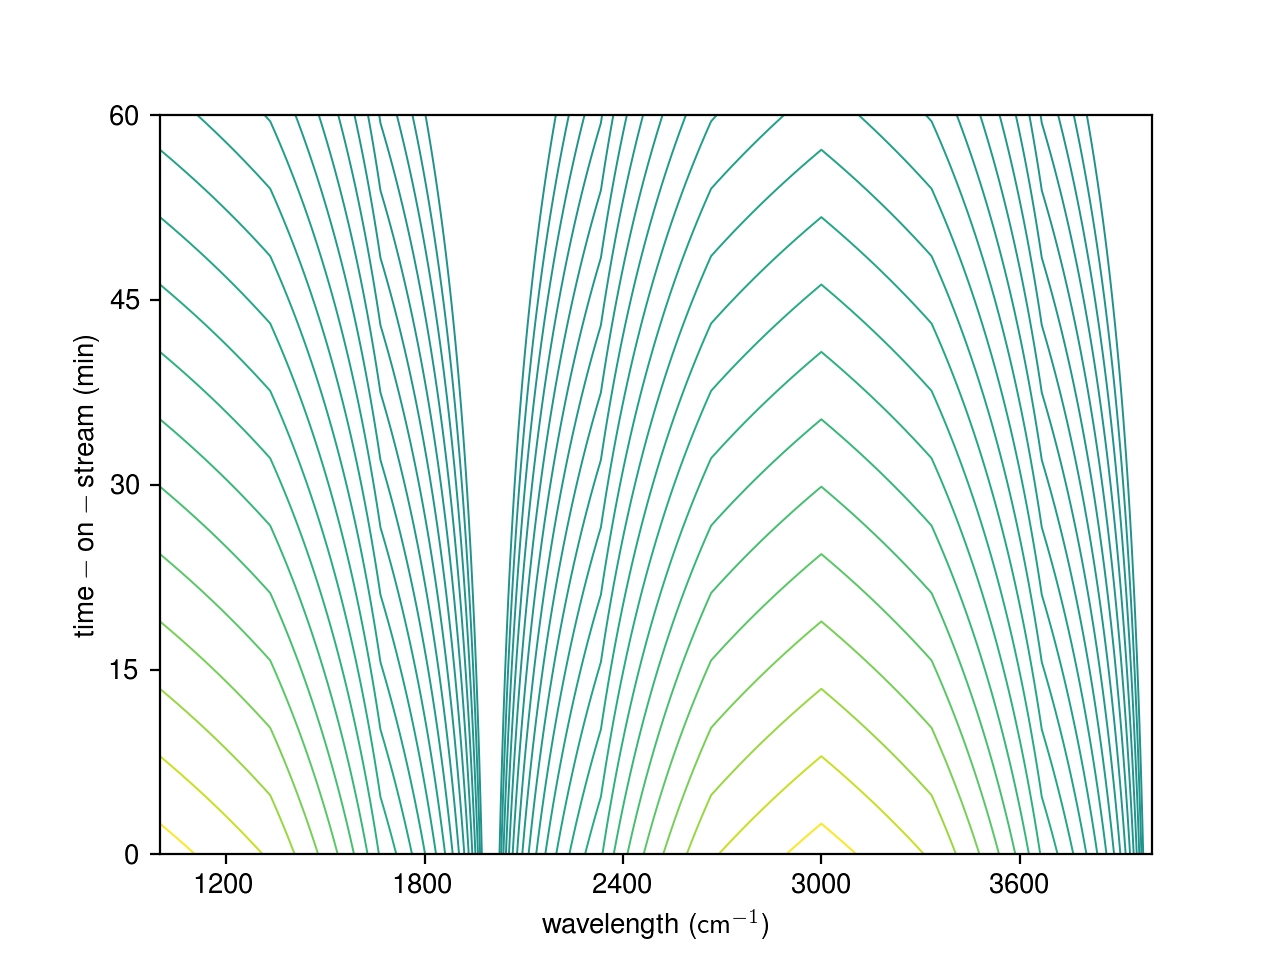

In [10]:
new.plot()

We can change or add labels to axes after creation of the dataset

In [11]:
from datetime import datetime, timedelta
date = lambda t: datetime.today() + timedelta(minutes=t)
axe1.labels = [date(t) for t in axe1.data]
axe1

title,Time-on-stream
coordinates,"[ 0 0.606 ..., 59.4 60]"
units,min
labels,"[datetime.datetime(2017, 7, 13, 8, 30, 57, 474776) datetime.datetime(2017, 7, 13, 8, 31, 33, 838446) ..., datetime.datetime(2017, 7, 13, 9, 30, 21, 113778) datetime.datetime(2017, 7, 13, 9, 30, 57, 477425)]"


In [25]:
str(axe1[20].labels)

'2017-07-13 08:43:04.747788'

In [13]:
# axe1[datetime(2017, 7, 13, 3, 30):datetime(2017, 7, 13, 4, 1)]
# TODO: make slicing using date labels

Dataset can be transposed

In [14]:
newT = new.T
newT

NDDataset([[ 5.4e-27, 5.29e-27, ..., 7.46e-28, 7.31e-28],
           [2.25e+04, 2.21e+04, ..., 3.11e+03, 3.05e+03],
           ..., 
           [6.75e+04, 6.62e+04, ..., 9.32e+03, 9.14e+03],
           [   9e+04, 8.82e+04, ..., 1.24e+04, 1.22e+04]])

<IPython.core.display.Javascript object>


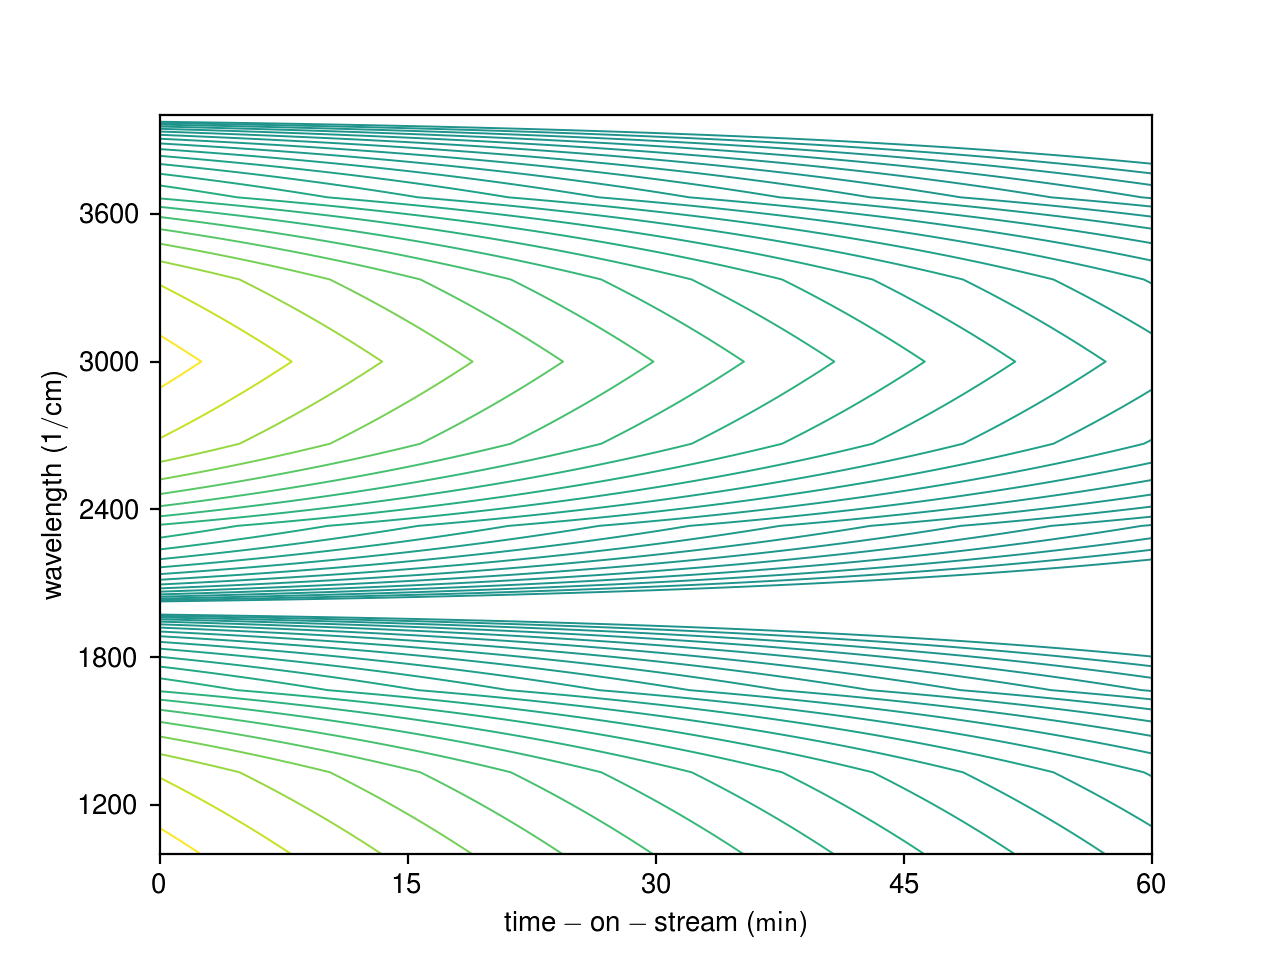

In [15]:
newT.plot()

### Loading of experimental data

Now, lets load a NMR dataset (in the Bruker format).

The builtin **data_dir** variable contains a path to our *test*'s data:

In [16]:
# let check if this directory exists and display its actual content:
import os
if os.path.exists(data_dir):
    l = list_data_dir
list_data_dir

<IPython.core.display.Javascript object>


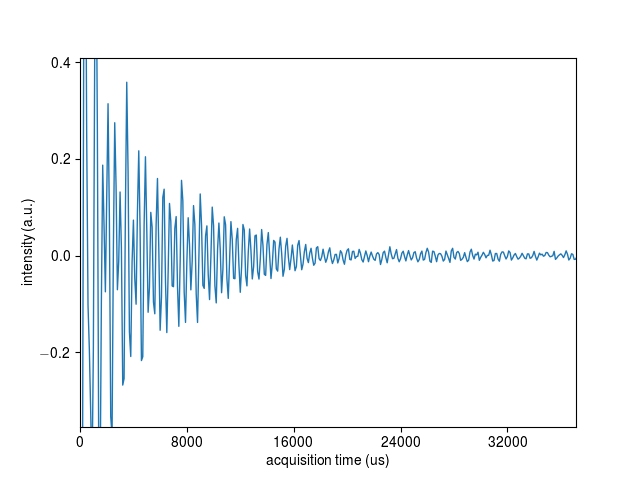

In [27]:
path = os.path.join(data_dir, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')

# load the data in a new dataset
ndd = NDDataset()
ndd.read_bruker_nmr(path, expno=1, remove_digital_filter=True)

# view it...
ndd.plot() 

<IPython.core.display.Javascript object>


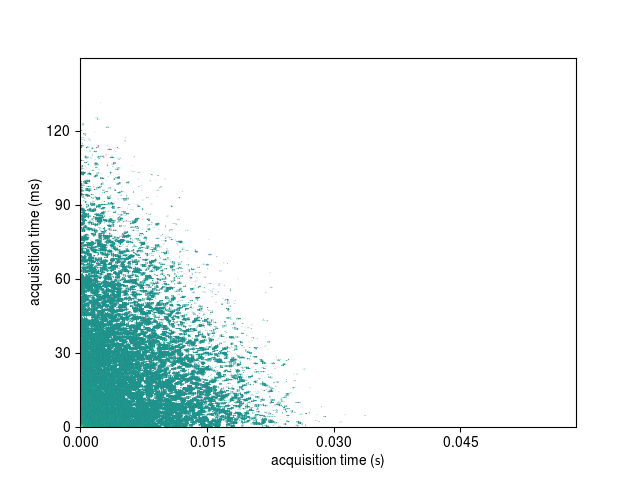

In [28]:
path = os.path.join(data_dir, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')

# load the data directly (no need to create the dataset first)
ndd2 = NDDataset.read_bruker_nmr(path, expno=1, remove_digital_filter=True)

# view it...
ndd2.x.to('s')
ndd2.y.to('ms')
fig2 = ndd2.plot() 
fig2

### IR data

In [29]:
source = NDDataset.read_omnic(os.path.join(data_dir, 'irdata', 'NH4Y-activation.SPG'))
source

NDDataset([[    2.06,     2.06, ...,     2.01,     2.01],
           [    2.03,     2.04, ...,     1.91,     1.91],
           ..., 
           [    1.79,     1.79, ...,      1.2,      1.2],
           [    1.82,     1.82, ...,     1.24,     1.24]])

In [30]:
source = read_omnic(NDDataset(), os.path.join(data_dir, 'irdata', 'NH4Y-activation.SPG'))
source

NDDataset([[    2.06,     2.06, ...,     2.01,     2.01],
           [    2.03,     2.04, ...,     1.91,     1.91],
           ..., 
           [    1.79,     1.79, ...,      1.2,      1.2],
           [    1.82,     1.82, ...,     1.24,     1.24]])

<IPython.core.display.Javascript object>


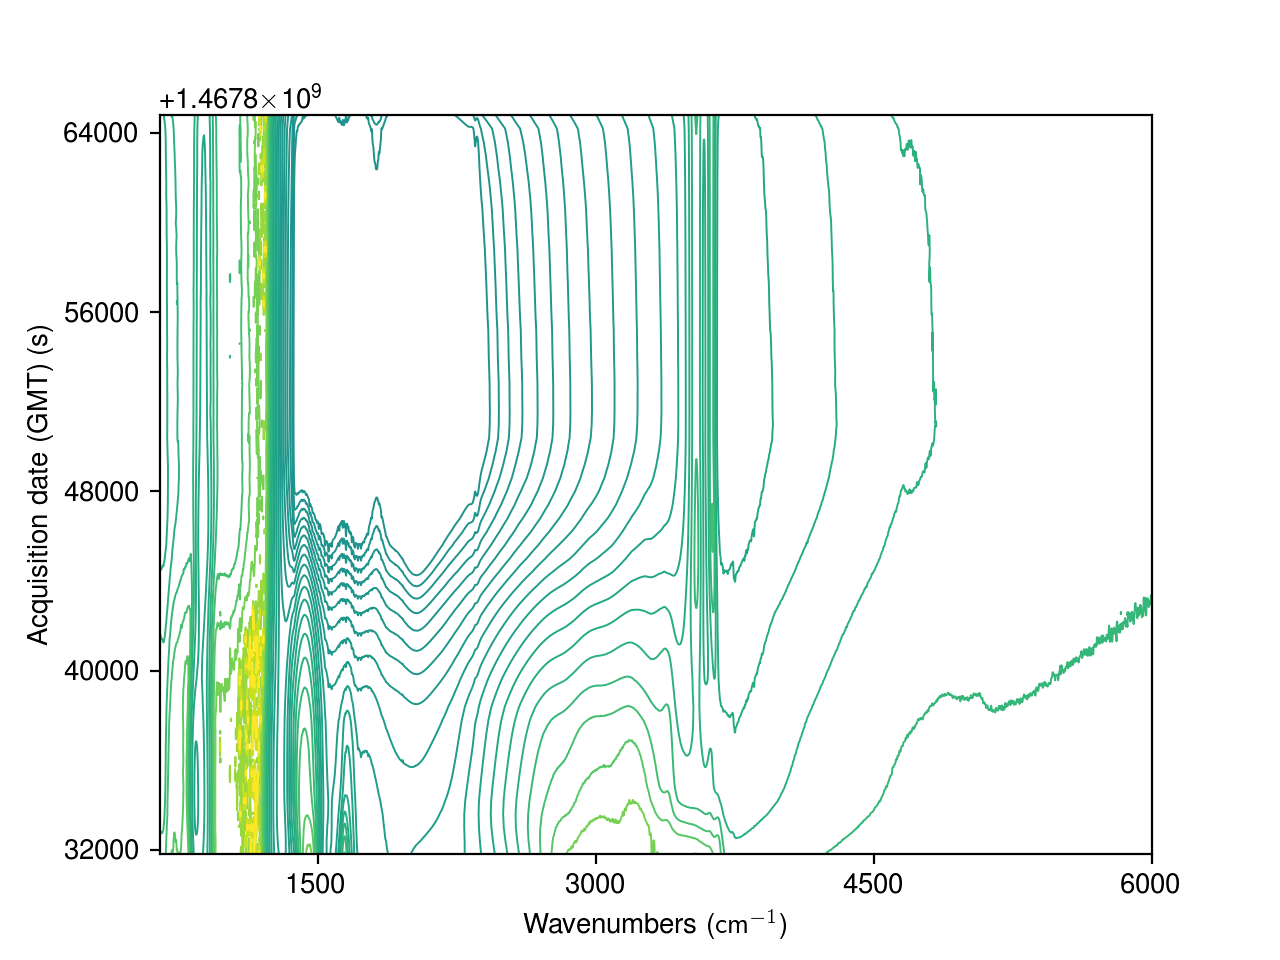

In [20]:
source.plot()  #TODO: change to a stacked plot by default (also add a display for the date from labels)

In [21]:
source2 = source.copy()
axe0 = source2.axes[0]
axe0.labels

array([[datetime.datetime(2016, 7, 6, 19, 3, 14, tzinfo=datetime.timezone.utc),
        datetime.datetime(2016, 7, 6, 19, 13, 14, tzinfo=datetime.timezone.utc),
        ...,
        datetime.datetime(2016, 7, 7, 4, 3, 17, tzinfo=datetime.timezone.utc),
        datetime.datetime(2016, 7, 7, 4, 13, 17, tzinfo=datetime.timezone.utc)],
       ['vz0466.spa, Wed Jul 06 21:00:38 2016 (GMT+02:00)',
        'vz0467.spa, Wed Jul 06 21:10:38 2016 (GMT+02:00)', ...,
        'vz0520.spa, Thu Jul 07 06:00:41 2016 (GMT+02:00)',
        'vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)']], dtype=object)

In [22]:
# modify axe Y
axe0 -= axe0[0]
axe0.title = u'Aquisition time'
axe0[0]

title,Aquisition time
coordinates,0.0
units,s
labels,"[datetime.datetime(2016, 7, 6, 19, 3, 14, tzinfo=datetime.timezone.utc) 'vz0466.spa, Wed Jul 06 21:00:38 2016 (GMT+02:00)']"


<IPython.core.display.Javascript object>


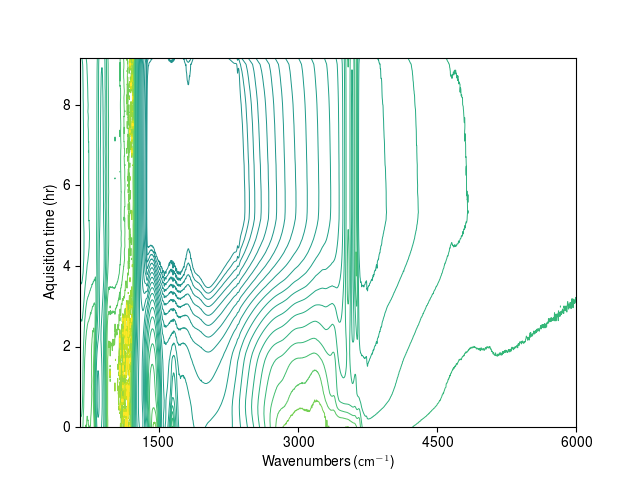

In [31]:
source2.y.to('hour')
source2.plot()
